## Support Vector Machine implementation on 220 Band AVIRIS Hyperspectral Image of Indian Pine Test Site 3 

## Steps :
## --> 1. Load Dataset 
## --> 2. Data Preprocessing (Converting from 3D to 2D)
## --> 3. Feature Extraction (Segmented PCA)
## --> 4. Data Cleaning (Removing 0 class) 
## --> 5. Normalization (Z Score Normalization)
## --> 6. Train Test Splitting (70% Train , 30% Test)
## --> 7. Apply Grid search on train dataset and Find best values for hyperparameter
## --> 8. Find Training Accuracy
## --> 9. Testing Accuracy

# 1. Load Dataset

### Import Library

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
%matplotlib inline

### read .lan file

In [2]:
#import the package
from spectral import *

In [3]:
data = open_image('D:\Academic Thesis Papers\Thesis Report 9\sample-data-master\92AV3C.lan')

In [4]:
data

	Data Source:   'D:\Academic Thesis Papers\Thesis Report 9\sample-data-master\92AV3C.lan'
	# Rows:            145
	# Samples:         145
	# Bands:           220
	Interleave:        BIL
	Quantization:  16 bits
	Data format:     int16

In [5]:
data.shape

(145, 145, 220)

In [6]:
data[:,:,:]

array([[[3172, 4142, 4506, ..., 1020, 1020, 1005],
        [3348, 4266, 4502, ..., 1029, 1020, 1000],
        [3687, 4266, 4421, ..., 1030, 1016, 1009],
        ...,
        [3341, 3890, 4320, ..., 1021, 1015, 1025],
        [3170, 4130, 4320, ..., 1024, 1020, 1011],
        [3172, 3890, 4316, ..., 1034, 1016, 1015]],

       [[3344, 4388, 4334, ..., 1030, 1006, 1015],
        [3515, 4264, 4592, ..., 1039, 1015, 1020],
        [3518, 4268, 4423, ..., 1026, 1015, 1020],
        ...,
        [3859, 4512, 4605, ..., 1035, 1015,  996],
        [3686, 4264, 4690, ..., 1012, 1020, 1014],
        [3512, 4268, 4597, ..., 1019, 1016, 1010]],

       [[3512, 4146, 4416, ..., 1029, 1025, 1010],
        [3344, 4389, 4416, ..., 1021, 1011, 1000],
        [3512, 4273, 4420, ..., 1033, 1010, 1014],
        ...,
        [3341, 4266, 4509, ..., 1025, 1010, 1005],
        [3344, 4262, 4496, ..., 1029, 1020, 1005],
        [3510, 4142, 4230, ..., 1025, 1011, 1010]],

       ...,

       [[3324, 3728, 400

### read ground truth data

In [7]:
ground_truth_data = open_image('D:\Academic Thesis Papers\Thesis Report 9\sample-data-master\92AV3GT.GIS').read_band(0)

In [8]:
ground_truth_data

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

# 2. Data Preprocessing (Converting from 3D to 2D)

### Prepare dataset by making the band number as features and pixel number as rows

In [9]:
dictionary = dict()
value = list()

for z in range(220):
    count = z + 1
    key = 'band_' + str(count)
    
    for x in range(145):
        for y in range(145):
            value.append(data[x,y,z])
    
    dictionary[key] = value
    value = list()
            
dictionary

{'band_1': [3172,
  3348,
  3687,
  3517,
  3514,
  3343,
  3343,
  3343,
  3346,
  3522,
  3858,
  3514,
  3343,
  3343,
  3343,
  3343,
  3343,
  3343,
  3346,
  3514,
  3341,
  3172,
  3343,
  3341,
  3167,
  3004,
  3514,
  3341,
  3170,
  3170,
  3170,
  3167,
  3002,
  3338,
  2996,
  3004,
  3514,
  3343,
  3346,
  3517,
  3517,
  3514,
  3348,
  3687,
  3514,
  3346,
  3514,
  3343,
  3346,
  3514,
  3343,
  3343,
  3343,
  3348,
  3687,
  3511,
  3172,
  3346,
  3514,
  3346,
  3519,
  3690,
  3690,
  3690,
  3693,
  3858,
  3517,
  3517,
  3511,
  3170,
  3175,
  3514,
  3343,
  3343,
  3341,
  3172,
  3341,
  3167,
  2999,
  3170,
  3162,
  2657,
  3170,
  3167,
  3002,
  3341,
  3172,
  3338,
  2999,
  3170,
  3167,
  2996,
  2999,
  3167,
  3002,
  3341,
  3178,
  3690,
  3687,
  3517,
  3517,
  3514,
  3343,
  3346,
  3511,
  3175,
  3514,
  3343,
  3343,
  3343,
  3341,
  3172,
  3343,
  3346,
  3511,
  3172,
  3341,
  3170,
  3178,
  3685,
  3343,
  3341,
  3175,
  3517

In [10]:
dictionary['band_1']

[3172,
 3348,
 3687,
 3517,
 3514,
 3343,
 3343,
 3343,
 3346,
 3522,
 3858,
 3514,
 3343,
 3343,
 3343,
 3343,
 3343,
 3343,
 3346,
 3514,
 3341,
 3172,
 3343,
 3341,
 3167,
 3004,
 3514,
 3341,
 3170,
 3170,
 3170,
 3167,
 3002,
 3338,
 2996,
 3004,
 3514,
 3343,
 3346,
 3517,
 3517,
 3514,
 3348,
 3687,
 3514,
 3346,
 3514,
 3343,
 3346,
 3514,
 3343,
 3343,
 3343,
 3348,
 3687,
 3511,
 3172,
 3346,
 3514,
 3346,
 3519,
 3690,
 3690,
 3690,
 3693,
 3858,
 3517,
 3517,
 3511,
 3170,
 3175,
 3514,
 3343,
 3343,
 3341,
 3172,
 3341,
 3167,
 2999,
 3170,
 3162,
 2657,
 3170,
 3167,
 3002,
 3341,
 3172,
 3338,
 2999,
 3170,
 3167,
 2996,
 2999,
 3167,
 3002,
 3341,
 3178,
 3690,
 3687,
 3517,
 3517,
 3514,
 3343,
 3346,
 3511,
 3175,
 3514,
 3343,
 3343,
 3343,
 3341,
 3172,
 3343,
 3346,
 3511,
 3172,
 3341,
 3170,
 3178,
 3685,
 3343,
 3341,
 3175,
 3517,
 3517,
 3517,
 3517,
 3519,
 3690,
 3693,
 3858,
 3519,
 3687,
 3522,
 3861,
 3687,
 3517,
 3514,
 3346,
 3514,
 3338,
 3002,
 3341,

### Prepare ground truth data as target data

In [11]:
ground_truth_data

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [12]:
ground_truth_data.shape

(145, 145)

In [13]:
# number of unique values and their count

diff = dict()

for i in range(145):
    for j in range(145):
        if ground_truth_data[i,j] not in diff:
            diff[ground_truth_data[i,j]] = 1
        else:
            diff[ground_truth_data[i,j]] = diff[ground_truth_data[i,j]] + 1
diff

{3: 834,
 0: 10659,
 15: 380,
 11: 2468,
 12: 614,
 5: 497,
 10: 968,
 14: 1294,
 16: 95,
 2: 1434,
 4: 234,
 8: 489,
 6: 747,
 9: 20,
 1: 54,
 7: 26,
 13: 212}

NB : So there are total 17 classes in this ground truth data

In [14]:
target = ground_truth_data.reshape(21025,)
target

array([3, 3, 3, ..., 0, 0, 0], dtype=int8)

In [15]:
print(target.shape)
print(target.ndim)

(21025,)
1


### making df

In [16]:
df = pd.DataFrame(dictionary)

In [17]:
df.head()

band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
0    3172    4142    4506    4279    4782    5048    5213    5106    5053   
1    3348    4266    4502    4426    4853    5249    5352    5353    5347   
2    3687    4266    4421    4498    5019    5293    5438    5427    5383   
3    3517    4258    4603    4493    4958    5234    5417    5355    5349   
4    3514    4018    4675    4417    4886    5117    5215    5096    5098   

   band_10  ...  band_211  band_212  band_213  band_214  band_215  band_216  \
0     4750  ...      1094      1090      1112      1090      1062      1069   
1     5065  ...      1108      1104      1117      1091      1079      1085   
2     5132  ...      1111      1114      1114      1100      1065      1092   
3     5096  ...      1122      1108      1109      1109      1071      1088   
4     4834  ...      1110      1107      1112      1094      1072      1087   

   band_217  band_218  band_219  band_220  
0      1057      1020      1020      1005  
1      1064      1029      1020      1000  
2      1061      1030      1016      1009  
3      1060      1030      1006      1005  
4      1052      1034      1019      1019  

[5 rows x 220 columns]

# 3. Feature Extraction (Segmented PCA)

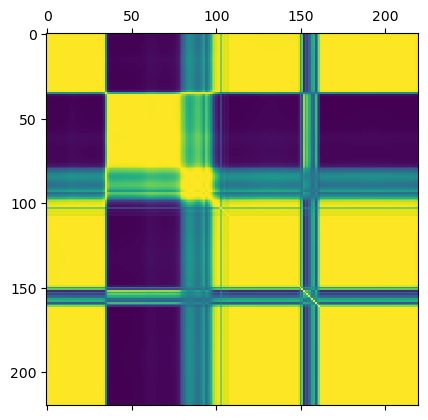

In [18]:
corr_matrix = df.corr()
# sns.heatmap(corr_matrix, annot=True)
# plt.show()

plt.matshow(corr_matrix.corr())
plt.show()

In [19]:
df1 = df.iloc[:,:36] #100
df1

band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
0        3172    4142    4506    4279    4782    5048    5213    5106    5053   
1        3348    4266    4502    4426    4853    5249    5352    5353    5347   
2        3687    4266    4421    4498    5019    5293    5438    5427    5383   
3        3517    4258    4603    4493    4958    5234    5417    5355    5349   
4        3514    4018    4675    4417    4886    5117    5215    5096    5098   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
21020    3329    3987    4011    4023    4201    4377    4418    4248    4180   
21021    3494    4104    4024    3880    4210    4377    4413    4174    4229   
21022    3153    3864    4282    3889    4310    4372    4375    4208    4096   
21023    3155    4104    4109    4027    4139    4318    4413    4174    4140   
21024    3323    3860    4197    3952    4148    4279    4375    4225    3988   

       band_10  ...  band_27  band_28  band_29  band_30  band_31  band_32  \
0         4750  ...     4207     4305     4311     3991     4168     3942   
1         5065  ...     4698     4794     4806     4452     4628     4433   
2         5132  ...     4862     4965     4992     4595     4756     4529   
3         5096  ...     4720     4848     4847     4484     4613     4402   
4         4834  ...     4297     4408     4401     4102     4227     4075   
...        ...  ...      ...      ...      ...      ...      ...      ...   
21020     3838  ...     2397     2366     2313     2198     2464     2261   
21021     3900  ...     2387     2362     2322     2199     2463     2188   
21022     3878  ...     2373     2335     2308     2198     2449     2164   
21023     3933  ...     2359     2339     2289     2184     2415     2236   
21024     3866  ...     2370     2352     2296     2187     2430     2139   

       band_33  band_34  band_35  band_36  
0         4061     4365     4318     4252  
1         4643     4967     4853     4760  
2         4801     5077     4983     4868  
3         4674     4966     4848     4776  
4         4264     4529     4490     4438  
...        ...      ...      ...      ...  
21020     2490     3124     3643     4349  
21021     2444     3077     3576     4239  
21022     2443     3048     3585     4264  
21023     2418     2935     3385     4017  
21024     2354     2966     3493     4071  

[21025 rows x 36 columns]

In [20]:
df2 = df.iloc[:,36:102] #100:170
df2

band_37  band_38  band_39  band_40  band_41  band_42  band_43  band_44  \
0         4869     5284     5055     3591     5175     5217     5058     4969   
1         5449     5768     5684     3987     5773     5789     5607     5585   
2         5515     5972     5913     4027     5846     6005     5828     5729   
3         5473     5894     5789     4086     5785     5938     5694     5563   
4         5001     5378     5321     3779     5357     5496     5278     5169   
...        ...      ...      ...      ...      ...      ...      ...      ...   
21020     5748     6973     7199     5067     7532     7634     7331     7181   
21021     5706     6965     7227     5108     7636     7725     7415     7216   
21022     5689     6839     7027     5013     7461     7605     7273     7141   
21023     5283     6354     6602     4703     6983     7086     6800     6615   
21024     5261     6418     6571     4702     6924     7076     6771     6707   

       band_45  band_46  ...  band_93  band_94  band_95  band_96  band_97  \
0         4721     4291  ...     2740     2947     2706     2834     2856   
1         5165     4720  ...     2951     3133     2842     3028     3038   
2         5282     4823  ...     2989     3141     2883     3091     3119   
3         5148     4735  ...     2978     3128     2908     3075     3065   
4         4883     4459  ...     2828     3004     2770     2954     2927   
...        ...      ...  ...      ...      ...      ...      ...      ...   
21020     6651     6132  ...     2918     3071     2841     3016     2984   
21021     6686     6227  ...     2860     3049     2854     3027     2984   
21022     6542     6055  ...     2856     3023     2825     2973     2964   
21023     6178     5672  ...     2683     2860     2689     2856     2808   
21024     6327     5727  ...     2721     2877     2626     2828     2785   

       band_98  band_99  band_100  band_101  band_102  
0         2683     2400      2229      1822      1542  
1         2842     2550      2359      1916      1615  
2         2907     2610      2388      1939      1613  
3         2880     2573      2382      1900      1594  
4         2782     2490      2312      1864      1572  
...        ...      ...       ...       ...       ...  
21020     2757     2436      2167      1761      1476  
21021     2788     2454      2204      1743      1475  
21022     2746     2414      2176      1734      1462  
21023     2610     2308      2084      1662      1427  
21024     2584     2292      2063      1672      1416  

[21025 rows x 66 columns]

In [21]:
df3 = df.iloc[:,102:] #170:
df3

band_103  band_104  band_105  band_106  band_107  band_108  band_109  \
0          1097      1029      1020      1026      1009      1011      1047   
1          1118      1014      1020      1031      1016      1021      1036   
2          1093      1032      1052      1018      1016      1009      1039   
3          1093      1030      1015      1034      1018      1018      1030   
4          1094      1024      1030      1029      1025      1023      1047   
...         ...       ...       ...       ...       ...       ...       ...   
21020      1071      1007      1021      1030      1035      1017      1025   
21021      1086      1031      1015      1036      1031      1017      1020   
21022      1076      1015      1020      1026      1020      1019      1025   
21023      1068      1025      1003      1016      1033      1026      1020   
21024      1071      1033      1003      1015      1026      1026      1023   

       band_110  band_111  band_112  ...  band_211  band_212  band_213  \
0          1069      1100      1122  ...      1094      1090      1112   
1          1071      1110      1128  ...      1108      1104      1117   
2          1076      1106      1143  ...      1111      1114      1114   
3          1071      1112      1135  ...      1122      1108      1109   
4          1074      1112      1125  ...      1110      1107      1112   
...         ...       ...       ...  ...       ...       ...       ...   
21020      1032      1029      1043  ...      1013      1012      1018   
21021      1034      1035      1051  ...      1012      1014      1012   
21022      1024      1037      1054  ...      1016      1015      1016   
21023      1030      1043      1049  ...      1005      1011      1008   
21024      1034      1043      1049  ...      1018      1014      1007   

       band_214  band_215  band_216  band_217  band_218  band_219  band_220  
0          1090      1062      1069      1057      1020      1020      1005  
1          1091      1079      1085      1064      1029      1020      1000  
2          1100      1065      1092      1061      1030      1016      1009  
3          1109      1071      1088      1060      1030      1006      1005  
4          1094      1072      1087      1052      1034      1019      1019  
...         ...       ...       ...       ...       ...       ...       ...  
21020      1015      1011      1001      1000      1009      1008      1009  
21021      1024       998      1010      1006      1000      1000      1004  
21022      1021      1008      1019      1003      1008      1000      1009  
21023      1012      1014      1007      1011      1005      1003      1004  
21024      1015      1002      1010      1007      1004      1000      1000  

[21025 rows x 118 columns]

In [22]:
from sklearn.decomposition import PCA

In [23]:
# df1
pca = PCA(n_components=36)
pca.fit(df1)
x1_pca = pca.transform(df1)
df1 = pd.DataFrame(x1_pca)
df1

0           1           2           3           4   \
0      2799.694490  499.055759  -89.980763  244.096869   41.979843   
1      5197.274984  -68.124703 -111.739848  154.323482   41.657739   
2      5924.800721 -162.729005  -70.537056 -133.604369  139.349693   
3      5352.588897  -70.323972    3.724937    9.111022   92.351713   
4      3372.495289  269.370771   -1.993624  -72.928058  196.241532   
...            ...         ...         ...         ...         ...   
21020 -4823.109671  -51.866205  312.326303  -90.123002  -69.263869   
21021 -4896.186913   86.020580  368.578291 -244.193104 -115.916451   
21022 -4977.639564   78.118262  318.098481   72.396422    1.937317   
21023 -5147.672429  413.673408  295.302244   36.748842 -221.814722   
21024 -5111.078038  271.010805  266.407576  -90.067489   60.477870   

               5           6           7          8          9   ...  \
0      -90.894602   67.149992  -76.820884  40.113271  38.691049  ...   
1      -38.994144  -47.543064   -5.149835  37.102363 -68.551159  ...   
2      -87.182470 -177.610663   60.767773  30.339106  57.634629  ...   
3      -89.562609  -14.911647  -58.784878 -15.623868  21.884738  ...   
4      -73.115256  215.110900  -77.665663 -41.571282  72.202654  ...   
...           ...         ...         ...        ...        ...  ...   
21020 -110.695577    6.457069  148.186730 -23.767118  -7.176473  ...   
21021 -114.255810  -87.814076   35.956728  94.703950   6.889231  ...   
21022 -143.187587  254.663919  -55.193645  58.268338  94.544934  ...   
21023 -112.522814   68.433953   67.135778 -55.818835 -48.276037  ...   
21024 -155.406025  101.864756  -72.747779 -61.482878  -5.597815  ...   

              26         27         28         29         30         31  \
0      -4.947774  22.300953  24.137968  17.375498 -12.244497  -3.071285   
1     -23.608557  -8.530263  -8.509964  16.840345  -2.629180  -7.082203   
2     -10.525866  10.560778 -12.559082 -22.621796  18.551798   8.654433   
3      -0.298129  19.499473 -17.326807 -20.584458  16.202523  -1.388830   
4      -4.781927  11.079784  11.790978 -46.205139  26.846890   0.580104   
...          ...        ...        ...        ...        ...        ...   
21020 -12.775381  32.341494  -3.860010   4.559557  -2.395896 -15.335086   
21021   5.582721  25.687422   5.859802  31.287472   8.653150   0.666165   
21022   0.755116 -11.044841 -10.691973  31.607567  20.342375   3.408584   
21023 -44.958176 -17.609412   9.735548  18.023433   6.273470  30.983319   
21024 -31.804865 -16.790268   5.122535   5.381625  -2.049187  11.348150   

              32         33         34         35  
0      -4.369582  10.030713  -8.554580   4.012980  
1      -7.714244   3.733190   6.746563   9.071830  
2     -17.037403  19.008786  -0.210260   7.760393  
3      17.630307   2.454273 -11.996545   6.556884  
4      37.703320  -5.551109 -20.133495  16.007417  
...          ...        ...        ...        ...  
21020  10.188569   9.088115  -3.013134 -10.728532  
21021   2.734208   7.596308 -12.983356  -7.196376  
21022  10.426163  21.762180  -2.612965   6.953623  
21023   9.215706  20.746718   3.737912  -1.501608  
21024  15.171637  25.846141   0.424387  -7.017023  

[21025 rows x 36 columns]

In [24]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.97656395, 0.98776217, 0.99431976, 0.99591728, 0.99674931,
       0.99740606, 0.99793235, 0.9983115 , 0.99859608, 0.99877565,
       0.998921  , 0.99904936, 0.99915338, 0.99924148, 0.9993224 ,
       0.99939435, 0.99946224, 0.99952775, 0.99958602, 0.99963852,
       0.99968742, 0.99972961, 0.99976544, 0.99979796, 0.99982544,
       0.99984758, 0.99986932, 0.99988767, 0.99990493, 0.99992182,
       0.99993672, 0.99995103, 0.99996453, 0.99997709, 0.99998906,
       1.        ])

In [25]:
df1 = df1.iloc[:,:12]
df1

0           1           2           3           4   \
0      2799.694490  499.055759  -89.980763  244.096869   41.979843   
1      5197.274984  -68.124703 -111.739848  154.323482   41.657739   
2      5924.800721 -162.729005  -70.537056 -133.604369  139.349693   
3      5352.588897  -70.323972    3.724937    9.111022   92.351713   
4      3372.495289  269.370771   -1.993624  -72.928058  196.241532   
...            ...         ...         ...         ...         ...   
21020 -4823.109671  -51.866205  312.326303  -90.123002  -69.263869   
21021 -4896.186913   86.020580  368.578291 -244.193104 -115.916451   
21022 -4977.639564   78.118262  318.098481   72.396422    1.937317   
21023 -5147.672429  413.673408  295.302244   36.748842 -221.814722   
21024 -5111.078038  271.010805  266.407576  -90.067489   60.477870   

               5           6           7          8          9          10  \
0      -90.894602   67.149992  -76.820884  40.113271  38.691049  11.193546   
1      -38.994144  -47.543064   -5.149835  37.102363 -68.551159  49.909523   
2      -87.182470 -177.610663   60.767773  30.339106  57.634629  67.539957   
3      -89.562609  -14.911647  -58.784878 -15.623868  21.884738  81.985133   
4      -73.115256  215.110900  -77.665663 -41.571282  72.202654  89.678674   
...           ...         ...         ...        ...        ...        ...   
21020 -110.695577    6.457069  148.186730 -23.767118  -7.176473  34.709333   
21021 -114.255810  -87.814076   35.956728  94.703950   6.889231 -42.981626   
21022 -143.187587  254.663919  -55.193645  58.268338  94.544934 -30.505940   
21023 -112.522814   68.433953   67.135778 -55.818835 -48.276037  11.357254   
21024 -155.406025  101.864756  -72.747779 -61.482878  -5.597815  -8.514076   

               11  
0       -7.664851  
1      -28.023960  
2      -16.270535  
3      -44.085782  
4       25.115799  
...           ...  
21020  -40.589783  
21021  -56.332124  
21022  -25.666268  
21023 -103.125258  
21024  -83.197976  

[21025 rows x 12 columns]

In [26]:
# df2
pca = PCA(n_components=66)
pca.fit(df2)
x2_pca = pca.transform(df2)
df2 = pd.DataFrame(x2_pca)
df2

0            1           2           3          4   \
0      4054.551473   -16.560740  103.090218   61.091349   0.099858   
1      1487.910546   485.805149  390.439142   64.996213 -45.309081   
2       723.696656   687.653360  429.317165   37.452433 -25.802714   
3      1191.488310   562.183301  448.268223   51.168068 -13.790247   
4      3058.326625   234.390410  141.948588  -44.979286   2.961355   
...            ...          ...         ...         ...        ...   
21020 -5616.913126  -632.328986  -50.032226 -172.371699   9.122973   
21021 -5852.555455  -700.336961  -84.564691 -266.764604 -17.899054   
21022 -5005.417436  -752.039539   39.807406 -243.565886  61.006539   
21023 -2982.314525 -1268.277683 -236.254281 -199.776756 -66.048548   
21024 -3392.568753 -1067.767893 -506.985619  -78.131619 -42.967551   

               5          6          7          8          9   ...         56  \
0       61.561364 -77.355049 -14.036272 -56.518803  24.350329  ...   0.764163   
1       58.363369 -59.460515  28.899154  11.708018  27.332054  ...   9.310262   
2       96.170846  30.047588  73.164633  -3.164727  38.769898  ...  13.633208   
3       54.547692  32.508220  21.802836  25.321968   9.838233  ...   1.456088   
4       77.840271 -14.614955  66.340396 -31.730459  12.968294  ...  13.165690   
...           ...        ...        ...        ...        ...  ...        ...   
21020   58.621475  -6.213275 -47.956067   5.297651  25.192632  ... -12.449129   
21021   55.705589  10.615498 -66.565216  24.495333  62.324218  ... -33.703375   
21022   71.160031 -32.545972 -70.911096  39.828834 -14.292820  ...  -8.592911   
21023   34.664436  30.146088 -54.406063 -29.104862  46.830107  ... -29.882129   
21024  114.480088 -46.142770 -45.888969 -76.447721 -59.141321  ...  -5.354541   

              57         58         59         60         61         62  \
0       3.415194 -29.906349  -2.019485   2.806742  -4.416496  11.780654   
1      -9.199287  -6.563397  26.713046   4.590782 -10.468724   3.393362   
2       4.725137  -2.211067  25.884745  10.600152  14.834800   1.175659   
3     -20.845054  14.523434  16.314080 -18.707074   2.382404  -3.114241   
4     -22.950955  -0.602482  -6.079983  -5.587085   3.048836  16.072307   
...          ...        ...        ...        ...        ...        ...   
21020   5.318691   8.945587   3.899823  -5.414894 -31.027419  14.432370   
21021  -4.338474  -9.094119 -36.651173 -12.820533   5.489208  -3.708884   
21022  15.516619 -23.878964 -15.533334   1.155658  23.352565 -14.347992   
21023 -12.372559 -14.741523  -1.269296   0.337343  13.036083 -17.837508   
21024 -15.053466  -5.065390  15.446459  -0.455925  -1.607975  -4.896161   

              63         64         65  
0     -17.423228  -6.116807  -3.189646  
1     -19.086295  -1.547465   5.817174  
2       8.250548  -0.502310  -6.649372  
3      -3.988032 -25.284658   0.016647  
4      -1.335936 -21.607913  -2.597364  
...          ...        ...        ...  
21020  -3.397748  21.913748  -2.623875  
21021   5.080699 -10.134012   5.413153  
21022  -0.817147  -6.579805   0.422218  
21023  -2.511382  -9.188210  12.586239  
21024   5.059801   2.156970  -5.753086  

[21025 rows x 66 columns]

In [27]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.92734988, 0.98872361, 0.99623723, 0.9971893 , 0.99753013,
       0.99776394, 0.99793735, 0.9980742 , 0.99818203, 0.99828662,
       0.99838889, 0.99848712, 0.99857899, 0.9986685 , 0.99875409,
       0.99883314, 0.99890774, 0.99897493, 0.99903451, 0.9990876 ,
       0.99913451, 0.99917933, 0.99921983, 0.9992553 , 0.99928904,
       0.99931869, 0.99934523, 0.99937154, 0.99939684, 0.99942184,
       0.99944581, 0.99946887, 0.99949092, 0.99951262, 0.99953425,
       0.99955558, 0.99957605, 0.99959611, 0.99961591, 0.99963468,
       0.99965328, 0.99967154, 0.99968928, 0.99970611, 0.9997229 ,
       0.99973951, 0.99975595, 0.9997722 , 0.99978799, 0.99980334,
       0.9998185 , 0.99983333, 0.9998481 , 0.99986265, 0.99987656,
       0.99989021, 0.99990337, 0.99991621, 0.99992892, 0.99994128,
       0.99995287, 0.99996419, 0.99997545, 0.99998483, 0.99999331,
       1.        ])

In [28]:
df2 = df2.iloc[:,:19]
df2

0            1           2           3          4   \
0      4054.551473   -16.560740  103.090218   61.091349   0.099858   
1      1487.910546   485.805149  390.439142   64.996213 -45.309081   
2       723.696656   687.653360  429.317165   37.452433 -25.802714   
3      1191.488310   562.183301  448.268223   51.168068 -13.790247   
4      3058.326625   234.390410  141.948588  -44.979286   2.961355   
...            ...          ...         ...         ...        ...   
21020 -5616.913126  -632.328986  -50.032226 -172.371699   9.122973   
21021 -5852.555455  -700.336961  -84.564691 -266.764604 -17.899054   
21022 -5005.417436  -752.039539   39.807406 -243.565886  61.006539   
21023 -2982.314525 -1268.277683 -236.254281 -199.776756 -66.048548   
21024 -3392.568753 -1067.767893 -506.985619  -78.131619 -42.967551   

               5          6          7          8          9          10  \
0       61.561364 -77.355049 -14.036272 -56.518803  24.350329 -15.871362   
1       58.363369 -59.460515  28.899154  11.708018  27.332054  33.373322   
2       96.170846  30.047588  73.164633  -3.164727  38.769898   1.955368   
3       54.547692  32.508220  21.802836  25.321968   9.838233 -77.335741   
4       77.840271 -14.614955  66.340396 -31.730459  12.968294 -54.179162   
...           ...        ...        ...        ...        ...        ...   
21020   58.621475  -6.213275 -47.956067   5.297651  25.192632  14.219620   
21021   55.705589  10.615498 -66.565216  24.495333  62.324218   9.177633   
21022   71.160031 -32.545972 -70.911096  39.828834 -14.292820  25.112688   
21023   34.664436  30.146088 -54.406063 -29.104862  46.830107   1.556971   
21024  114.480088 -46.142770 -45.888969 -76.447721 -59.141321   5.367539   

              11          12         13         14         15         16  \
0      19.580538   -6.104766  -7.855462 -67.795383 -13.058412  27.461679   
1      39.406011   26.519891  -8.842550  55.589441  26.750630  12.558473   
2       2.972201  122.595442   3.313798 -41.254646  32.722482   8.773715   
3     -17.967973   30.760788  27.151927  36.362924  17.078353 -51.740129   
4       5.843998   10.885372  19.751635  20.970134  -4.482838 -39.463131   
...          ...         ...        ...        ...        ...        ...   
21020 -62.127188   -8.407652 -13.813211  -9.830128 -77.414373   7.967781   
21021 -91.592908  -48.132010  17.676809  -3.371431 -72.934069 -12.824042   
21022 -83.949578  -51.862002  14.708441 -10.547612  50.032631  30.095714   
21023 -55.948508  -44.825598  23.051604  28.429218 -19.227777  -7.603620   
21024 -13.763381  -22.735961 -72.553997 -49.544856 -70.448612  -9.502195   

              17         18  
0     -32.886768  18.748310  
1      11.420877   9.842675  
2      -7.028222 -45.358336  
3     -76.721786  12.693387  
4      17.444948   5.901240  
...          ...        ...  
21020 -26.401020 -35.010760  
21021   9.361548  -5.717454  
21022  28.508657  -5.432278  
21023  -7.626559 -14.408412  
21024  32.382654  18.041447  

[21025 rows x 19 columns]

In [29]:
# df3
pca = PCA(n_components=118)
pca.fit(df3)
x3_pca = pca.transform(df3)
df3 = pd.DataFrame(x3_pca)
df3

0           1          2          3          4          5    \
0      1214.369549  212.776672  26.445218 -22.698309 -15.356238  15.073364   
1      1668.695478  162.858774  25.032034 -30.591969   0.125493  20.986313   
2      1868.560758  143.571770  34.139166 -34.534506 -17.139244  -1.919090   
3      1766.687942  142.056931  27.948659 -33.814729 -30.218650   3.671388   
4      1432.070062  168.669629  24.844907 -19.656692   3.712947   8.682658   
...            ...         ...        ...        ...        ...        ...   
21020 -2100.331892   14.438398   6.701054  -2.795139  -3.787587 -12.118668   
21021 -2093.190705   11.917745   4.222941 -13.889227  -8.698372  22.829990   
21022 -2113.315865   17.777173   7.378683   3.814340  -0.866343   7.095358   
21023 -2254.700971   80.867095 -17.502122  -7.751309 -12.723027  17.810990   
21024 -2187.402717   74.692760 -11.954349  -6.706045  -2.724957 -20.222769   

             6          7          8          9    ...       108       109  \
0      -0.286022   6.304613   8.971471 -15.001536  ... -4.503890 -4.837413   
1      -6.221287   4.755808  13.262183 -20.229415  ... -7.036798  1.202560   
2     -13.143471  20.829300  13.436402   5.273322  ... -7.987237  8.331366   
3       4.671527   8.311832   2.872633 -10.754333  ...  1.648473  6.300168   
4     -12.266370   9.244493  -2.221369  -9.262713  ... -0.168852 -2.133360   
...          ...        ...        ...        ...  ...       ...       ...   
21020 -14.084107  10.981610 -21.456789 -10.795110  ...  1.782197  1.682587   
21021  17.927724 -14.363214 -21.997400   0.567272  ...  3.519402 -6.468104   
21022  -8.466880   1.161253  -9.480010  -8.810142  ...  3.505498 -5.903238   
21023   3.927722  -8.307425 -16.738573   7.810087  ...  0.256492  0.555739   
21024  -0.699386  14.914832 -14.062228  -6.935061  ... -1.875767  4.561116   

             110       111       112       113        114        115  \
0      -3.419129  0.277367 -6.827032  6.540516   4.986053   2.643180   
1      -2.743239  8.273948 -5.647324  3.820075  11.606425  -0.331019   
2      10.483856  6.584545 -4.584609 -2.236752   1.624110   3.295616   
3       6.538624  2.426846 -2.698703 -6.344527   3.758216   5.289160   
4       5.879232 -1.522459 -4.177560  1.050133   4.304827  -2.533009   
...          ...       ...       ...       ...        ...        ...   
21020  -2.939490  3.660591 -1.132993 -0.142288   6.982512   0.694673   
21021  -3.896617  3.102924 -3.977612  3.800265  -0.990477   2.167442   
21022  -2.544181 -0.074040  0.541643  0.375443  -4.766989   3.262289   
21023  -5.873383 -2.301091  3.545357  1.743169  -3.384090  -3.805873   
21024  -9.773647 -5.448226 -1.666190  2.396615  -2.674551 -12.261456   

             116       117  
0      -4.630126  2.819158  
1       0.499243  3.614770  
2      -2.421452  5.684807  
3      -0.347681 -3.420113  
4       3.480917 -8.389900  
...          ...       ...  
21020  -8.060863 -4.278703  
21021 -10.454758  4.704545  
21022   1.906570  2.213736  
21023   4.175635  0.275229  
21024   5.978522  1.081030  

[21025 rows x 118 columns]

In [30]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.99223496, 0.99754223, 0.99816304, 0.99830806, 0.99838129,
       0.99843808, 0.99849252, 0.9985426 , 0.99858632, 0.99862792,
       0.99866507, 0.99870068, 0.99873468, 0.99876654, 0.99879761,
       0.99882678, 0.9988541 , 0.99887942, 0.99890309, 0.99892583,
       0.99894827, 0.99897017, 0.99899171, 0.99901098, 0.9990298 ,
       0.99904805, 0.99906541, 0.99908192, 0.99909797, 0.99911376,
       0.9991293 , 0.99914435, 0.99915928, 0.99917395, 0.99918841,
       0.99920264, 0.99921673, 0.99923062, 0.99924446, 0.99925824,
       0.99927183, 0.99928532, 0.99929865, 0.99931189, 0.99932497,
       0.99933787, 0.99935053, 0.99936316, 0.99937556, 0.99938781,
       0.99939993, 0.99941199, 0.999424  , 0.99943599, 0.99944779,
       0.99945948, 0.99947114, 0.99948272, 0.99949413, 0.99950551,
       0.9995168 , 0.99952807, 0.99953923, 0.99955027, 0.99956125,
       0.99957209, 0.9995828 , 0.99959343, 0.99960398, 0.99961436,
       0.9996247 , 0.99963491, 0.99964503, 0.99965505, 0.99966

In [31]:
df3 = df3.iloc[:,:24]
df3

0           1          2          3          4          5   \
0      1214.369549  212.776672  26.445218 -22.698309 -15.356238  15.073364   
1      1668.695478  162.858774  25.032034 -30.591969   0.125493  20.986313   
2      1868.560758  143.571770  34.139166 -34.534506 -17.139244  -1.919090   
3      1766.687942  142.056931  27.948659 -33.814729 -30.218650   3.671388   
4      1432.070062  168.669629  24.844907 -19.656692   3.712947   8.682658   
...            ...         ...        ...        ...        ...        ...   
21020 -2100.331892   14.438398   6.701054  -2.795139  -3.787587 -12.118668   
21021 -2093.190705   11.917745   4.222941 -13.889227  -8.698372  22.829990   
21022 -2113.315865   17.777173   7.378683   3.814340  -0.866343   7.095358   
21023 -2254.700971   80.867095 -17.502122  -7.751309 -12.723027  17.810990   
21024 -2187.402717   74.692760 -11.954349  -6.706045  -2.724957 -20.222769   

              6          7          8          9   ...         14        15  \
0      -0.286022   6.304613   8.971471 -15.001536  ...  13.470789 -4.729710   
1      -6.221287   4.755808  13.262183 -20.229415  ...   2.946426  1.210187   
2     -13.143471  20.829300  13.436402   5.273322  ...  -4.614253  6.419093   
3       4.671527   8.311832   2.872633 -10.754333  ...  -0.528213 -5.992177   
4     -12.266370   9.244493  -2.221369  -9.262713  ...   4.875648 -2.643233   
...          ...        ...        ...        ...  ...        ...       ...   
21020 -14.084107  10.981610 -21.456789 -10.795110  ...  -5.743823  1.550238   
21021  17.927724 -14.363214 -21.997400   0.567272  ...  -4.778921 -1.332107   
21022  -8.466880   1.161253  -9.480010  -8.810142  ...  -3.776860  3.097956   
21023   3.927722  -8.307425 -16.738573   7.810087  ...  -1.075463  3.783147   
21024  -0.699386  14.914832 -14.062228  -6.935061  ...  -2.425535  6.394974   

              16        17         18         19        20         21  \
0      11.234222 -6.334594   0.291271  14.189147  7.579514  -0.064226   
1       8.361693 -2.906836  -6.284917   9.788593  8.357767  -5.253708   
2      21.166489  4.097158  10.474257   8.446554  3.346149 -15.809714   
3      -2.220319  8.633270   3.032783  15.889965 -7.275683  -4.729482   
4      -1.490083  5.292629   3.968106  11.807946 -3.736372   1.368277   
...          ...       ...        ...        ...       ...        ...   
21020 -16.337250  1.069722  12.094215   2.221613 -4.094157  -5.421704   
21021   0.090317  3.709412  10.618219   3.794675  1.063083   2.294032   
21022   1.475989  8.056128   7.067474   0.981574 -6.174938  -5.751062   
21023 -11.732387 -7.824128   1.306133 -12.929391 -6.193828   0.836913   
21024  -9.728772 -2.877621  -3.263874  -1.804215  0.006058   0.120769   

              22         23  
0     -19.880670   8.602920  
1      -1.574264   3.215354  
2      -3.731089  15.234760  
3       3.220065   5.281183  
4     -10.337327  -4.047830  
...          ...        ...  
21020  -1.093124  -0.090714  
21021   7.102235   1.087865  
21022   0.597461  -6.459004  
21023   8.949305  -9.995893  
21024   0.754447  -2.028314  

[21025 rows x 24 columns]

In [32]:
df = pd.concat([df1, df2, df3], axis=1)
df

0           1           2           3           4   \
0      2799.694490  499.055759  -89.980763  244.096869   41.979843   
1      5197.274984  -68.124703 -111.739848  154.323482   41.657739   
2      5924.800721 -162.729005  -70.537056 -133.604369  139.349693   
3      5352.588897  -70.323972    3.724937    9.111022   92.351713   
4      3372.495289  269.370771   -1.993624  -72.928058  196.241532   
...            ...         ...         ...         ...         ...   
21020 -4823.109671  -51.866205  312.326303  -90.123002  -69.263869   
21021 -4896.186913   86.020580  368.578291 -244.193104 -115.916451   
21022 -4977.639564   78.118262  318.098481   72.396422    1.937317   
21023 -5147.672429  413.673408  295.302244   36.748842 -221.814722   
21024 -5111.078038  271.010805  266.407576  -90.067489   60.477870   

               5           6           7          8          9   ...  \
0      -90.894602   67.149992  -76.820884  40.113271  38.691049  ...   
1      -38.994144  -47.543064   -5.149835  37.102363 -68.551159  ...   
2      -87.182470 -177.610663   60.767773  30.339106  57.634629  ...   
3      -89.562609  -14.911647  -58.784878 -15.623868  21.884738  ...   
4      -73.115256  215.110900  -77.665663 -41.571282  72.202654  ...   
...           ...         ...         ...        ...        ...  ...   
21020 -110.695577    6.457069  148.186730 -23.767118  -7.176473  ...   
21021 -114.255810  -87.814076   35.956728  94.703950   6.889231  ...   
21022 -143.187587  254.663919  -55.193645  58.268338  94.544934  ...   
21023 -112.522814   68.433953   67.135778 -55.818835 -48.276037  ...   
21024 -155.406025  101.864756  -72.747779 -61.482878  -5.597815  ...   

              14        15         16        17         18         19  \
0      13.470789 -4.729710  11.234222 -6.334594   0.291271  14.189147   
1       2.946426  1.210187   8.361693 -2.906836  -6.284917   9.788593   
2      -4.614253  6.419093  21.166489  4.097158  10.474257   8.446554   
3      -0.528213 -5.992177  -2.220319  8.633270   3.032783  15.889965   
4       4.875648 -2.643233  -1.490083  5.292629   3.968106  11.807946   
...          ...       ...        ...       ...        ...        ...   
21020  -5.743823  1.550238 -16.337250  1.069722  12.094215   2.221613   
21021  -4.778921 -1.332107   0.090317  3.709412  10.618219   3.794675   
21022  -3.776860  3.097956   1.475989  8.056128   7.067474   0.981574   
21023  -1.075463  3.783147 -11.732387 -7.824128   1.306133 -12.929391   
21024  -2.425535  6.394974  -9.728772 -2.877621  -3.263874  -1.804215   

             20         21         22         23  
0      7.579514  -0.064226 -19.880670   8.602920  
1      8.357767  -5.253708  -1.574264   3.215354  
2      3.346149 -15.809714  -3.731089  15.234760  
3     -7.275683  -4.729482   3.220065   5.281183  
4     -3.736372   1.368277 -10.337327  -4.047830  
...         ...        ...        ...        ...  
21020 -4.094157  -5.421704  -1.093124  -0.090714  
21021  1.063083   2.294032   7.102235   1.087865  
21022 -6.174938  -5.751062   0.597461  -6.459004  
21023 -6.193828   0.836913   8.949305  -9.995893  
21024  0.006058   0.120769   0.754447  -2.028314  

[21025 rows x 55 columns]

In [33]:
df.columns = range(0,55)

In [34]:
df

0           1           2           3           4   \
0      2799.694490  499.055759  -89.980763  244.096869   41.979843   
1      5197.274984  -68.124703 -111.739848  154.323482   41.657739   
2      5924.800721 -162.729005  -70.537056 -133.604369  139.349693   
3      5352.588897  -70.323972    3.724937    9.111022   92.351713   
4      3372.495289  269.370771   -1.993624  -72.928058  196.241532   
...            ...         ...         ...         ...         ...   
21020 -4823.109671  -51.866205  312.326303  -90.123002  -69.263869   
21021 -4896.186913   86.020580  368.578291 -244.193104 -115.916451   
21022 -4977.639564   78.118262  318.098481   72.396422    1.937317   
21023 -5147.672429  413.673408  295.302244   36.748842 -221.814722   
21024 -5111.078038  271.010805  266.407576  -90.067489   60.477870   

               5           6           7          8          9   ...  \
0      -90.894602   67.149992  -76.820884  40.113271  38.691049  ...   
1      -38.994144  -47.543064   -5.149835  37.102363 -68.551159  ...   
2      -87.182470 -177.610663   60.767773  30.339106  57.634629  ...   
3      -89.562609  -14.911647  -58.784878 -15.623868  21.884738  ...   
4      -73.115256  215.110900  -77.665663 -41.571282  72.202654  ...   
...           ...         ...         ...        ...        ...  ...   
21020 -110.695577    6.457069  148.186730 -23.767118  -7.176473  ...   
21021 -114.255810  -87.814076   35.956728  94.703950   6.889231  ...   
21022 -143.187587  254.663919  -55.193645  58.268338  94.544934  ...   
21023 -112.522814   68.433953   67.135778 -55.818835 -48.276037  ...   
21024 -155.406025  101.864756  -72.747779 -61.482878  -5.597815  ...   

              45        46         47        48         49         50  \
0      13.470789 -4.729710  11.234222 -6.334594   0.291271  14.189147   
1       2.946426  1.210187   8.361693 -2.906836  -6.284917   9.788593   
2      -4.614253  6.419093  21.166489  4.097158  10.474257   8.446554   
3      -0.528213 -5.992177  -2.220319  8.633270   3.032783  15.889965   
4       4.875648 -2.643233  -1.490083  5.292629   3.968106  11.807946   
...          ...       ...        ...       ...        ...        ...   
21020  -5.743823  1.550238 -16.337250  1.069722  12.094215   2.221613   
21021  -4.778921 -1.332107   0.090317  3.709412  10.618219   3.794675   
21022  -3.776860  3.097956   1.475989  8.056128   7.067474   0.981574   
21023  -1.075463  3.783147 -11.732387 -7.824128   1.306133 -12.929391   
21024  -2.425535  6.394974  -9.728772 -2.877621  -3.263874  -1.804215   

             51         52         53         54  
0      7.579514  -0.064226 -19.880670   8.602920  
1      8.357767  -5.253708  -1.574264   3.215354  
2      3.346149 -15.809714  -3.731089  15.234760  
3     -7.275683  -4.729482   3.220065   5.281183  
4     -3.736372   1.368277 -10.337327  -4.047830  
...         ...        ...        ...        ...  
21020 -4.094157  -5.421704  -1.093124  -0.090714  
21021  1.063083   2.294032   7.102235   1.087865  
21022 -6.174938  -5.751062   0.597461  -6.459004  
21023 -6.193828   0.836913   8.949305  -9.995893  
21024  0.006058   0.120769   0.754447  -2.028314  

[21025 rows x 55 columns]

In [35]:
target

array([3, 3, 3, ..., 0, 0, 0], dtype=int8)

In [36]:
df['target'] = target
df

0           1           2           3           4  \
0      2799.694490  499.055759  -89.980763  244.096869   41.979843   
1      5197.274984  -68.124703 -111.739848  154.323482   41.657739   
2      5924.800721 -162.729005  -70.537056 -133.604369  139.349693   
3      5352.588897  -70.323972    3.724937    9.111022   92.351713   
4      3372.495289  269.370771   -1.993624  -72.928058  196.241532   
...            ...         ...         ...         ...         ...   
21020 -4823.109671  -51.866205  312.326303  -90.123002  -69.263869   
21021 -4896.186913   86.020580  368.578291 -244.193104 -115.916451   
21022 -4977.639564   78.118262  318.098481   72.396422    1.937317   
21023 -5147.672429  413.673408  295.302244   36.748842 -221.814722   
21024 -5111.078038  271.010805  266.407576  -90.067489   60.477870   

                5           6           7          8          9  ...  \
0      -90.894602   67.149992  -76.820884  40.113271  38.691049  ...   
1      -38.994144  -47.543064   -5.149835  37.102363 -68.551159  ...   
2      -87.182470 -177.610663   60.767773  30.339106  57.634629  ...   
3      -89.562609  -14.911647  -58.784878 -15.623868  21.884738  ...   
4      -73.115256  215.110900  -77.665663 -41.571282  72.202654  ...   
...           ...         ...         ...        ...        ...  ...   
21020 -110.695577    6.457069  148.186730 -23.767118  -7.176473  ...   
21021 -114.255810  -87.814076   35.956728  94.703950   6.889231  ...   
21022 -143.187587  254.663919  -55.193645  58.268338  94.544934  ...   
21023 -112.522814   68.433953   67.135778 -55.818835 -48.276037  ...   
21024 -155.406025  101.864756  -72.747779 -61.482878  -5.597815  ...   

             46         47        48         49         50        51  \
0     -4.729710  11.234222 -6.334594   0.291271  14.189147  7.579514   
1      1.210187   8.361693 -2.906836  -6.284917   9.788593  8.357767   
2      6.419093  21.166489  4.097158  10.474257   8.446554  3.346149   
3     -5.992177  -2.220319  8.633270   3.032783  15.889965 -7.275683   
4     -2.643233  -1.490083  5.292629   3.968106  11.807946 -3.736372   
...         ...        ...       ...        ...        ...       ...   
21020  1.550238 -16.337250  1.069722  12.094215   2.221613 -4.094157   
21021 -1.332107   0.090317  3.709412  10.618219   3.794675  1.063083   
21022  3.097956   1.475989  8.056128   7.067474   0.981574 -6.174938   
21023  3.783147 -11.732387 -7.824128   1.306133 -12.929391 -6.193828   
21024  6.394974  -9.728772 -2.877621  -3.263874  -1.804215  0.006058   

              52         53         54  target  
0      -0.064226 -19.880670   8.602920       3  
1      -5.253708  -1.574264   3.215354       3  
2     -15.809714  -3.731089  15.234760       3  
3      -4.729482   3.220065   5.281183       3  
4       1.368277 -10.337327  -4.047830       3  
...          ...        ...        ...     ...  
21020  -5.421704  -1.093124  -0.090714       0  
21021   2.294032   7.102235   1.087865       0  
21022  -5.751062   0.597461  -6.459004       0  
21023   0.836913   8.949305  -9.995893       0  
21024   0.120769   0.754447  -2.028314       0  

[21025 rows x 56 columns]

# 4. Data Cleaning (Removing 0 class) 

In [37]:
df = df[df['target']!=0]

In [38]:
df

0           1           2           3           4  \
0      2799.694490  499.055759  -89.980763  244.096869   41.979843   
1      5197.274984  -68.124703 -111.739848  154.323482   41.657739   
2      5924.800721 -162.729005  -70.537056 -133.604369  139.349693   
3      5352.588897  -70.323972    3.724937    9.111022   92.351713   
4      3372.495289  269.370771   -1.993624  -72.928058  196.241532   
...            ...         ...         ...         ...         ...   
20763   586.067986  211.467179 -265.307378 -195.083483 -108.021030   
20764  1935.245160  126.806191 -413.243329  -30.731296 -138.423739   
20765  2739.136218   66.026186 -498.388137  -21.349441 -124.211382   
20766  3123.660515   47.184975 -556.832070 -170.412307   25.038304   
20767  3388.921627  142.605575 -328.779236 -121.871258   48.664634   

                5           6          7           8          9  ...  \
0      -90.894602   67.149992 -76.820884   40.113271  38.691049  ...   
1      -38.994144  -47.543064  -5.149835   37.102363 -68.551159  ...   
2      -87.182470 -177.610663  60.767773   30.339106  57.634629  ...   
3      -89.562609  -14.911647 -58.784878  -15.623868  21.884738  ...   
4      -73.115256  215.110900 -77.665663  -41.571282  72.202654  ...   
...           ...         ...        ...         ...        ...  ...   
20763  140.232870 -194.383453   7.901497  117.655738 -11.420525  ...   
20764   33.087647  -59.874065 -26.280973  -63.716003 -43.358543  ...   
20765   65.270467  -49.720746  -8.584512   67.242382   3.063894  ...   
20766  -24.950351  -46.399226   8.332616   67.126831  -9.034325  ...   
20767  -81.557695   26.419665  58.014710   15.471441   5.412343  ...   

              46         47         48         49         50         51  \
0      -4.729710  11.234222  -6.334594   0.291271  14.189147   7.579514   
1       1.210187   8.361693  -2.906836  -6.284917   9.788593   8.357767   
2       6.419093  21.166489   4.097158  10.474257   8.446554   3.346149   
3      -5.992177  -2.220319   8.633270   3.032783  15.889965  -7.275683   
4      -2.643233  -1.490083   5.292629   3.968106  11.807946  -3.736372   
...          ...        ...        ...        ...        ...        ...   
20763   6.164094  11.535600 -17.506112   7.164416  -9.933129 -16.837400   
20764   1.313672   1.344809   1.526610   5.907186  -3.502763  -8.329234   
20765  -3.714572  19.453270   3.614723   0.185591   4.771525 -16.126071   
20766   6.618928  10.882216   9.821725   2.267677   4.981531 -19.246117   
20767  21.578874  -1.389019   8.928947  13.900329 -12.237214  -8.391847   

              52         53         54  target  
0      -0.064226 -19.880670   8.602920       3  
1      -5.253708  -1.574264   3.215354       3  
2     -15.809714  -3.731089  15.234760       3  
3      -4.729482   3.220065   5.281183       3  
4       1.368277 -10.337327  -4.047830       3  
...          ...        ...        ...     ...  
20763   4.444108   5.184742   5.154759      10  
20764 -17.346302  -4.877152 -10.812708      10  
20765 -14.161017   1.440367 -17.758160      10  
20766  -6.669001  -0.505527  10.355988      10  
20767  11.620034  -0.870286  -0.052443      10  

[10366 rows x 56 columns]

In [39]:
x = df[df.columns[:-1]]
x

0           1           2           3           4   \
0      2799.694490  499.055759  -89.980763  244.096869   41.979843   
1      5197.274984  -68.124703 -111.739848  154.323482   41.657739   
2      5924.800721 -162.729005  -70.537056 -133.604369  139.349693   
3      5352.588897  -70.323972    3.724937    9.111022   92.351713   
4      3372.495289  269.370771   -1.993624  -72.928058  196.241532   
...            ...         ...         ...         ...         ...   
20763   586.067986  211.467179 -265.307378 -195.083483 -108.021030   
20764  1935.245160  126.806191 -413.243329  -30.731296 -138.423739   
20765  2739.136218   66.026186 -498.388137  -21.349441 -124.211382   
20766  3123.660515   47.184975 -556.832070 -170.412307   25.038304   
20767  3388.921627  142.605575 -328.779236 -121.871258   48.664634   

               5           6          7           8          9   ...  \
0      -90.894602   67.149992 -76.820884   40.113271  38.691049  ...   
1      -38.994144  -47.543064  -5.149835   37.102363 -68.551159  ...   
2      -87.182470 -177.610663  60.767773   30.339106  57.634629  ...   
3      -89.562609  -14.911647 -58.784878  -15.623868  21.884738  ...   
4      -73.115256  215.110900 -77.665663  -41.571282  72.202654  ...   
...           ...         ...        ...         ...        ...  ...   
20763  140.232870 -194.383453   7.901497  117.655738 -11.420525  ...   
20764   33.087647  -59.874065 -26.280973  -63.716003 -43.358543  ...   
20765   65.270467  -49.720746  -8.584512   67.242382   3.063894  ...   
20766  -24.950351  -46.399226   8.332616   67.126831  -9.034325  ...   
20767  -81.557695   26.419665  58.014710   15.471441   5.412343  ...   

              45         46         47         48         49         50  \
0      13.470789  -4.729710  11.234222  -6.334594   0.291271  14.189147   
1       2.946426   1.210187   8.361693  -2.906836  -6.284917   9.788593   
2      -4.614253   6.419093  21.166489   4.097158  10.474257   8.446554   
3      -0.528213  -5.992177  -2.220319   8.633270   3.032783  15.889965   
4       4.875648  -2.643233  -1.490083   5.292629   3.968106  11.807946   
...          ...        ...        ...        ...        ...        ...   
20763  12.597480   6.164094  11.535600 -17.506112   7.164416  -9.933129   
20764   4.709696   1.313672   1.344809   1.526610   5.907186  -3.502763   
20765  -8.445640  -3.714572  19.453270   3.614723   0.185591   4.771525   
20766  -5.920821   6.618928  10.882216   9.821725   2.267677   4.981531   
20767  17.050718  21.578874  -1.389019   8.928947  13.900329 -12.237214   

              51         52         53         54  
0       7.579514  -0.064226 -19.880670   8.602920  
1       8.357767  -5.253708  -1.574264   3.215354  
2       3.346149 -15.809714  -3.731089  15.234760  
3      -7.275683  -4.729482   3.220065   5.281183  
4      -3.736372   1.368277 -10.337327  -4.047830  
...          ...        ...        ...        ...  
20763 -16.837400   4.444108   5.184742   5.154759  
20764  -8.329234 -17.346302  -4.877152 -10.812708  
20765 -16.126071 -14.161017   1.440367 -17.758160  
20766 -19.246117  -6.669001  -0.505527  10.355988  
20767  -8.391847  11.620034  -0.870286  -0.052443  

[10366 rows x 55 columns]

In [40]:
y = df['target']
y

0         3
1         3
2         3
3         3
4         3
         ..
20763    10
20764    10
20765    10
20766    10
20767    10
Name: target, Length: 10366, dtype: int8

# 5. Normalization (Z Score Normalization)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(x)
standardized_data

array([[ 0.29148017,  1.04589767, -0.06893149, ...,  0.01884481,
        -2.62087837,  1.21167088],
       [ 0.85513712, -0.2127787 , -0.13761709, ..., -0.64795193,
        -0.20744737,  0.47021767],
       [ 1.0261741 , -0.42272282, -0.0075547 , ..., -2.00429342,
        -0.49179307,  2.12436493],
       ...,
       [ 0.27724328,  0.08492646, -1.35812665, ..., -1.79245238,
         0.18998746, -2.41622096],
       [ 0.36764266,  0.0431144 , -1.54261312, ..., -0.82980295,
        -0.06655009,  1.45293353],
       [ 0.43000398,  0.25487002, -0.82273236, ...,  1.52015571,
        -0.11463814,  0.0204936 ]])

In [42]:
x = pd.DataFrame(data = standardized_data)
x

0         1         2         3         4         5         6   \
0      0.291480  1.045898 -0.068931  1.545458  0.412707 -0.789238  0.653840   
1      0.855137 -0.212779 -0.137617  0.998129  0.409970 -0.291868 -0.588110   
2      1.026174 -0.422723 -0.007555 -0.757305  1.240039 -0.753664 -1.996543   
3      0.891650 -0.217659  0.226864  0.112800  0.840706 -0.776473 -0.234762   
4      0.426142  0.536185  0.208812 -0.387375  1.723438 -0.618856  2.256030   
...         ...       ...       ...       ...       ...       ...       ...   
10361 -0.228930  0.407686 -0.622375 -1.132130 -0.861821  1.425690 -2.178166   
10362  0.088253  0.219808 -1.089355 -0.130110 -1.120147  0.398902 -0.721636   
10363  0.277243  0.084926 -1.358127 -0.072911 -0.999387  0.707314 -0.611691   
10364  0.367643  0.043114 -1.542613 -0.981715  0.268758 -0.157285 -0.575724   
10365  0.430004  0.254870 -0.822732 -0.685771  0.469506 -0.699761  0.212793   

             7         8         9   ...        45        46        47  \
0     -1.058900  0.521166  0.741564  ...  1.444455 -0.482719  1.286359   
1     -0.133279  0.477687 -1.206146  ...  0.304202  0.181273  0.954854   
2      0.718036  0.380021  1.085613  ... -0.514953  0.763551  2.432594   
3     -0.825968 -0.283716  0.436331  ... -0.072255 -0.623844 -0.266365   
4     -1.069810 -0.658415  1.350194  ...  0.513222 -0.249482 -0.182092   
...         ...       ...       ...  ...       ...       ...       ...   
10361  0.035277  1.640933 -0.168552  ...  1.349837  0.735045  1.321139   
10362 -0.406185 -0.978200 -0.748603  ...  0.495242  0.192841  0.145069   
10363 -0.177638  0.912929  0.094511  ... -0.930062 -0.369242  2.234879   
10364  0.040844  0.911261 -0.125214  ... -0.656512  0.785889  1.245735   
10365  0.682481  0.165321  0.137163  ...  1.832319  2.458187 -0.170429   

             48        49        50        51        52        53        54  
0     -0.688977  0.063428  1.832980  0.989763  0.018845 -2.620878  1.211671  
1     -0.262908 -0.739770  1.275765  1.089929 -0.647952 -0.207447  0.470218  
2      0.607687  1.307151  1.105831  0.444904 -2.004293 -0.491793  2.124365  
3      1.171525  0.398269  2.048344 -0.922191 -0.580594  0.424615  0.754523  
4      0.756284  0.512507  1.531463 -0.466660  0.202907 -1.362729 -0.529364  
...         ...       ...       ...       ...       ...       ...       ...  
10361 -2.077594  0.902896 -1.221475 -2.152841  0.598121  0.683628  0.737124  
10362  0.288168  0.749341 -0.407237 -1.057789 -2.201730 -0.642885 -1.460367  
10363  0.547720  0.050521  0.640485 -2.061289 -1.792452  0.189987 -2.416221  
10364  1.319249  0.304821  0.667077 -2.462858 -0.829803 -0.066550  1.452934  
10365  1.208277  1.725603 -1.513227 -1.065848  1.520156 -0.114638  0.020494  

[10366 rows x 55 columns]

In [43]:
name = list()
for i in range (x.shape[1]):
    name.append('PC'+str(i+1))
name

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21',
 'PC22',
 'PC23',
 'PC24',
 'PC25',
 'PC26',
 'PC27',
 'PC28',
 'PC29',
 'PC30',
 'PC31',
 'PC32',
 'PC33',
 'PC34',
 'PC35',
 'PC36',
 'PC37',
 'PC38',
 'PC39',
 'PC40',
 'PC41',
 'PC42',
 'PC43',
 'PC44',
 'PC45',
 'PC46',
 'PC47',
 'PC48',
 'PC49',
 'PC50',
 'PC51',
 'PC52',
 'PC53',
 'PC54',
 'PC55']

In [44]:
x.columns = name
x

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      0.291480  1.045898 -0.068931  1.545458  0.412707 -0.789238  0.653840   
1      0.855137 -0.212779 -0.137617  0.998129  0.409970 -0.291868 -0.588110   
2      1.026174 -0.422723 -0.007555 -0.757305  1.240039 -0.753664 -1.996543   
3      0.891650 -0.217659  0.226864  0.112800  0.840706 -0.776473 -0.234762   
4      0.426142  0.536185  0.208812 -0.387375  1.723438 -0.618856  2.256030   
...         ...       ...       ...       ...       ...       ...       ...   
10361 -0.228930  0.407686 -0.622375 -1.132130 -0.861821  1.425690 -2.178166   
10362  0.088253  0.219808 -1.089355 -0.130110 -1.120147  0.398902 -0.721636   
10363  0.277243  0.084926 -1.358127 -0.072911 -0.999387  0.707314 -0.611691   
10364  0.367643  0.043114 -1.542613 -0.981715  0.268758 -0.157285 -0.575724   
10365  0.430004  0.254870 -0.822732 -0.685771  0.469506 -0.699761  0.212793   

            PC8       PC9      PC10  ...      PC46      PC47      PC48  \
0     -1.058900  0.521166  0.741564  ...  1.444455 -0.482719  1.286359   
1     -0.133279  0.477687 -1.206146  ...  0.304202  0.181273  0.954854   
2      0.718036  0.380021  1.085613  ... -0.514953  0.763551  2.432594   
3     -0.825968 -0.283716  0.436331  ... -0.072255 -0.623844 -0.266365   
4     -1.069810 -0.658415  1.350194  ...  0.513222 -0.249482 -0.182092   
...         ...       ...       ...  ...       ...       ...       ...   
10361  0.035277  1.640933 -0.168552  ...  1.349837  0.735045  1.321139   
10362 -0.406185 -0.978200 -0.748603  ...  0.495242  0.192841  0.145069   
10363 -0.177638  0.912929  0.094511  ... -0.930062 -0.369242  2.234879   
10364  0.040844  0.911261 -0.125214  ... -0.656512  0.785889  1.245735   
10365  0.682481  0.165321  0.137163  ...  1.832319  2.458187 -0.170429   

           PC49      PC50      PC51      PC52      PC53      PC54      PC55  
0     -0.688977  0.063428  1.832980  0.989763  0.018845 -2.620878  1.211671  
1     -0.262908 -0.739770  1.275765  1.089929 -0.647952 -0.207447  0.470218  
2      0.607687  1.307151  1.105831  0.444904 -2.004293 -0.491793  2.124365  
3      1.171525  0.398269  2.048344 -0.922191 -0.580594  0.424615  0.754523  
4      0.756284  0.512507  1.531463 -0.466660  0.202907 -1.362729 -0.529364  
...         ...       ...       ...       ...       ...       ...       ...  
10361 -2.077594  0.902896 -1.221475 -2.152841  0.598121  0.683628  0.737124  
10362  0.288168  0.749341 -0.407237 -1.057789 -2.201730 -0.642885 -1.460367  
10363  0.547720  0.050521  0.640485 -2.061289 -1.792452  0.189987 -2.416221  
10364  1.319249  0.304821  0.667077 -2.462858 -0.829803 -0.066550  1.452934  
10365  1.208277  1.725603 -1.513227 -1.065848  1.520156 -0.114638  0.020494  

[10366 rows x 55 columns]

# 6. Train Test Splitting (70% Train , 30% Test)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

In [46]:
X_train

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
693  -1.007401  1.049592  0.244769  1.851893  0.904859  0.108164 -0.112817   
2533  0.465251  0.855267  0.485198  0.623032  0.587690  0.049488  2.134658   
6123  0.151293 -1.497682  0.295349 -0.761657 -0.335326 -0.119781 -0.560445   
982  -1.227041  0.716762 -0.138583  1.395141 -0.799194  0.249828 -0.550870   
3497  1.328417 -0.453872 -0.214409  1.066021 -1.099520 -0.175817 -0.170273   
...        ...       ...       ...       ...       ...       ...       ...   
5734  0.490808  1.261364 -0.945853  2.251559  0.257411 -0.420013  0.169563   
5191  0.387024  1.039213 -0.290109 -1.064547 -1.352258  0.457672  0.439324   
5390  0.351525  1.561744 -0.634304  0.208223  0.878933 -0.453253  0.122402   
860  -1.434284 -0.595744  0.162475  1.463162  0.634440 -1.306631  0.789286   
7270  0.491945  0.024230 -1.560872  0.773480 -0.427494  0.202573  1.931745   

           PC8       PC9      PC10  ...      PC46      PC47      PC48  \
693  -0.647273  0.099635 -0.607776  ...  0.002502 -1.527206  0.043497   
2533  0.596569  0.496993 -0.203490  ...  0.467914 -0.173705  0.482613   
6123 -0.616722 -2.150503  1.413260  ... -0.547731 -0.539336  0.170665   
982  -0.810494  0.182746  0.310861  ... -0.701328 -0.126581 -0.671850   
3497 -1.094293 -0.169644 -0.685706  ...  0.588039  0.170023 -1.485116   
...        ...       ...       ...  ...       ...       ...       ...   
5734  0.389303  0.234550  0.090622  ... -0.433290  0.517837  0.851373   
5191 -0.188537  0.660705  0.240860  ... -1.046229 -1.163501 -0.250595   
5390 -1.760031  1.212851 -0.320898  ...  1.144748  0.925600  0.883732   
860   2.123310 -0.489680 -0.156392  ... -1.113627  1.013951 -0.867357   
7270 -0.412163  0.300397  1.443627  ... -0.205285  0.203037  0.973676   

          PC49      PC50      PC51      PC52      PC53      PC54      PC55  
693  -0.452812  0.667611  0.873587  2.063577 -0.772709  2.508824  0.039487  
2533 -0.477889 -1.001364 -0.491941  1.700114  0.089886 -0.945860 -0.688288  
6123  0.638062 -0.487095  0.116405  0.624644 -0.366163 -1.088887  0.902251  
982  -0.686882  0.036305 -1.796006  2.477043 -0.416420  0.485145  0.400069  
3497 -0.195639 -0.208465  1.042345 -0.867778  0.239423 -0.200327  2.424116  
...        ...       ...       ...       ...       ...       ...       ...  
5734  0.032881 -1.679334  1.029514  0.834861  0.331193 -0.931926  1.234259  
5191 -0.531655 -0.623100  0.989437  0.507048 -1.095749  1.530214 -0.053221  
5390 -2.693337  2.728994  0.177978  1.826821  1.413749 -1.719564  0.715325  
860   0.831328 -0.722669  0.268895 -1.607823  0.987100  0.680640 -0.064163  
7270  1.023524  1.135562  0.211765 -0.992609  0.028982  1.902302  0.837930  

[7256 rows x 55 columns]

In [47]:
X_test

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
1803   0.752419 -0.576681 -0.076669  0.837262 -0.996163 -0.126570 -0.670428   
321   -1.297622 -0.855301  0.272705  2.578199  0.549189  0.030761  1.185852   
7316   1.043687 -0.390609 -0.825370  0.643396  0.282542 -0.640715  0.211266   
8064  -0.557543  0.432025  0.148970 -1.178858  0.864298  0.783257 -0.730602   
10054  0.256026  0.412864 -0.811282  0.073777  0.600167 -0.166025  3.135858   
...         ...       ...       ...       ...       ...       ...       ...   
3668   0.598407 -0.317537 -0.245034  0.553482 -0.155338 -0.704501  0.256935   
5802   1.126769 -0.442088 -1.148379 -0.547683 -0.483897 -0.662436 -0.591388   
5900   0.453647  1.197862 -0.571763  0.070429 -0.318854  0.591431  0.933205   
10325  0.294441 -0.012414 -0.704837 -0.733833  0.442553 -0.324595 -0.067421   
6857  -0.802109 -1.294494  0.323595 -1.204810  1.671727  0.973236 -0.352434   

            PC8       PC9      PC10  ...      PC46      PC47      PC48  \
1803   0.568375  0.597625  0.607735  ... -0.220187 -0.550030  1.095501   
321    1.527727 -1.367060  0.179839  ... -0.214655  0.889604 -0.423515   
7316  -0.551435 -1.864514  0.197868  ... -1.299410  0.789572 -0.747102   
8064   1.468860 -0.570741 -0.790107  ... -0.360590 -0.602464 -0.677647   
10054  0.130644 -0.143376  0.012990  ...  1.045266 -0.045362  1.945258   
...         ...       ...       ...  ...       ...       ...       ...   
3668  -0.587141  0.505077  0.600590  ...  0.230252 -1.398696  1.660950   
5802  -1.405349  0.370231 -0.223441  ... -0.353191 -0.269525 -1.927262   
5900  -1.842247  2.024797 -0.364129  ... -1.913966  0.448441 -0.218975   
10325 -0.265898 -0.777386  0.905531  ...  0.567625 -1.210416  0.021458   
6857  -1.266728 -0.957076  0.430367  ...  1.099514  0.139375 -0.259048   

           PC49      PC50      PC51      PC52      PC53      PC54      PC55  
1803  -0.354541 -0.334996  0.781952 -2.245397 -1.401429  0.262857 -2.099290  
321    0.315518 -0.461232  0.197333 -0.412256  0.613299 -1.708068  0.589797  
7316  -0.313340 -1.463541 -0.165081  0.235694 -1.837377  1.119702  1.516325  
8064  -0.490524 -0.912672 -0.330983  0.918004 -0.271616  0.549952 -0.280529  
10054 -0.055987  0.727871 -0.959111 -0.524509  0.440674 -0.900461  0.087580  
...         ...       ...       ...       ...       ...       ...       ...  
3668   0.466117  0.889552  1.016917  1.472014 -1.868503  1.203485 -1.526452  
5802   0.149170  0.437133 -0.422019  0.216135  0.745815  0.261113 -0.990446  
5900  -0.682812  1.487773  0.647949  0.476264 -0.316453 -0.629527 -0.807685  
10325 -1.235886  0.818790 -0.103177  0.209101 -0.476801 -2.257541 -1.386745  
6857   0.756351 -0.348190 -0.558904 -0.653489 -0.767449 -0.233342  0.306083  

[3110 rows x 55 columns]

In [48]:
y_train

1284     14
5157     10
10408     5
1827     15
6454     10
         ..
9663     10
8789     10
9082     10
1575     14
12520    11
Name: target, Length: 7256, dtype: int8

In [49]:
y_test

3395     12
651      15
12651    11
14723     6
19474     3
         ..
6685      4
9785     11
9950     10
20335    10
11713     5
Name: target, Length: 3110, dtype: int8

# 7. Apply Grid search on training dataset and Find best values for hyperparameter

In [50]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, train_test_split

In [51]:
model = svm.SVC()

In [52]:
param_grid = {
    'C': [1,5,7,10,15,30,32,50,100,150,200],
    'kernel': ['rbf']
}

In [53]:
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 5, 7, 10, 15, 30, 32, 50, 100, 150, 200],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [54]:
best_params = grid_search.best_params_
print(best_params)

{'C': 5, 'kernel': 'rbf'}


In [55]:
best_params['C']

5

In [56]:
print(grid_search.best_score_)

0.8642517336373136


In [57]:
# from sklearn import svm
# from sklearn.metrics import accuracy_score

In [58]:
# train_accuracy = 0
# best_train_accuracy = 0

# for train_C in np.arange(1,50,9):
#     for train_gamma in np.arange(0.001,0.1,0.005):
        
#         model = svm.SVC(kernel='rbf',C=train_C, gamma=train_gamma)
#         model.fit(X_train,y_train)
#         y_pred = model.predict(X_train)
#         train_accuracy = accuracy_score(y_train, y_pred)

#         if train_accuracy > best_train_accuracy:
#             best_train_accuracy = train_accuracy
#             best_train_C = train_C
#             best_train_gamma = train_gamma
        
#         print('Current C : ',train_C,'Current gamma : ',train_gamma,'Current Accuracy : ',train_accuracy)
#         print('Current Best C : ',best_train_C,'Current Best gamma : ',best_train_gamma,'Current Best Accuracy : ',best_train_accuracy)
#         print('-------------------------------------------------------------------------------------------------------------')

due to no validation , the best_train_C and best_train_gamma ,  we have got from this manual grid search on only training dataset , aren't working well on testing dataset.

In [59]:
# print(best_train_C)
# print(best_train_gamma)
# print(best_train_accuracy)

# 8. Find Training Accuracy

In [60]:
from sklearn.metrics import accuracy_score
final_model = svm.SVC(kernel = 'rbf',C = best_params['C'])
final_model.fit(X_train,y_train)
y_pred = final_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print('Training Accuracy :',accuracy)

Training Accuracy : 0.9988974641675854


# 9. Testing Accuracy

In [61]:
# accuracy and classification report 

from sklearn.metrics import classification_report
final_model = svm.SVC(kernel = 'rbf',C = best_params['C'])
final_model.fit(X_train,y_train)

y_pred = final_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Overall Testing Accuracy :',accuracy)


report = classification_report(y_test, y_pred,labels=sorted(y_test.unique()))
print('\nClassification Report:\n')
print(report)

Overall Testing Accuracy : 0.8697749196141479

Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.75      0.86        16
           2       0.85      0.87      0.86       449
           3       0.86      0.78      0.82       267
           4       0.83      0.83      0.83        69
           5       0.97      0.95      0.96       149
           6       0.95      0.98      0.97       244
           7       1.00      0.80      0.89         5
           8       0.98      1.00      0.99       144
           9       1.00      0.60      0.75         5
          10       0.78      0.68      0.73       287
          11       0.80      0.87      0.83       725
          12       0.93      0.89      0.91       187
          13       1.00      1.00      1.00        54
          14       0.92      0.97      0.95       354
          15       0.87      0.69      0.77       124
          16       1.00      0.94      0.97        31

    accur

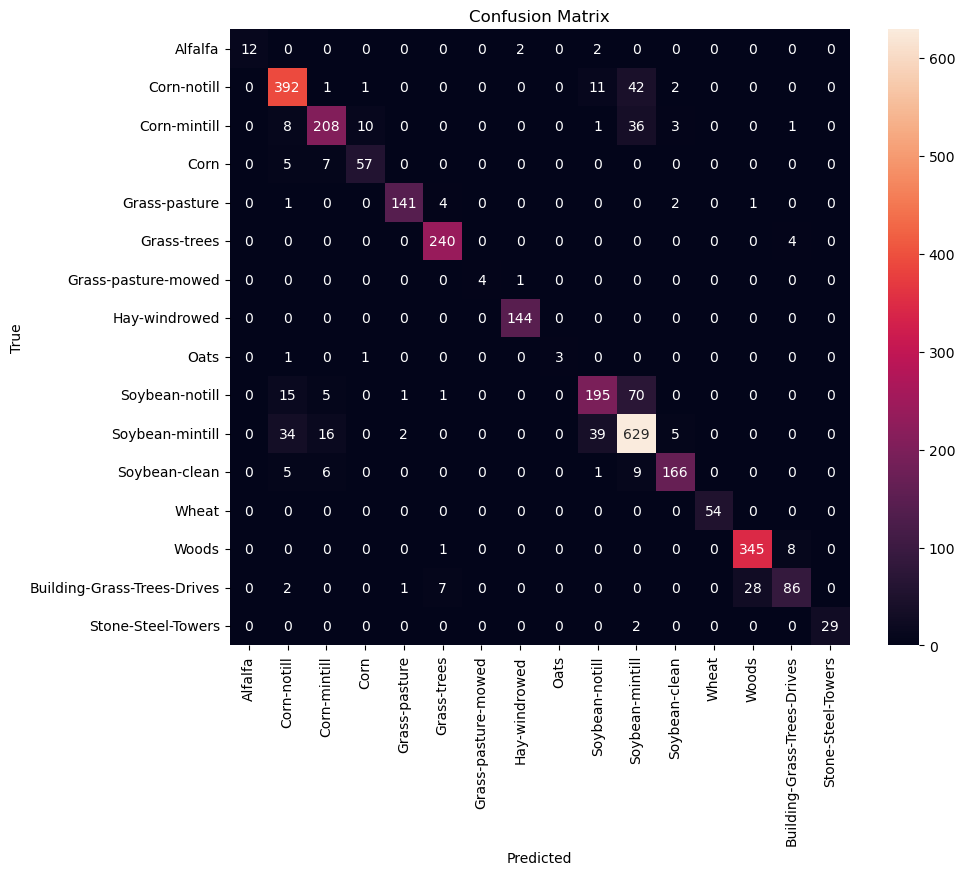

In [62]:
# confusion matrix
from sklearn.metrics import confusion_matrix

# Replace these with your actual ground truth and predicted labels
true_labels = y_test
predicted_labels = y_pred

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels (optional)
class_labels = ['Alfalfa','Corn-notill','Corn-mintill','Corn','Grass-pasture','Grass-trees','Grass-pasture-mowed','Hay-windrowed','Oats','Soybean-notill',
'Soybean-mintill','Soybean-clean','Wheat','Woods','Building-Grass-Trees-Drives','Stone-Steel-Towers']

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
# sns.set(font_scale=1.2)
# ns.set_style("whitegrid")
sns.heatmap(cm, annot=True, fmt="g", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ------------------------------------End-----------------------------------------

In [63]:
sorted(y_test.unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [64]:
y_test.value_counts()

11    725
2     449
14    354
10    287
3     267
6     244
12    187
5     149
8     144
15    124
4      69
13     54
16     31
1      16
9       5
7       5
Name: target, dtype: int64

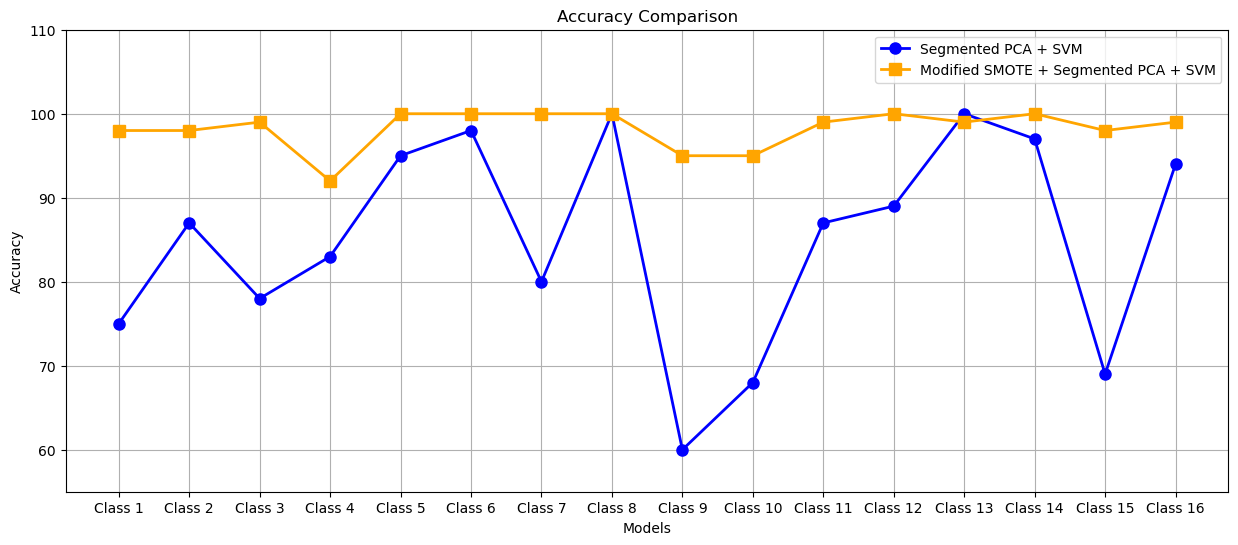

In [3]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Class 1','Class 2','Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9','Class 10',
 'Class 11','Class 12','Class 13','Class 14','Class 15','Class 16']
accuracies_1 = [75,87,78,83,95,98,80,100,60,68,87,89,100,97,69,94]
accuracies_2 = [98,98,99,92,100,100,100,100,95,95,99,100,99,100,98,99]

# Create a line graph with two lines
plt.figure(figsize=(15, 6))
plt.plot(categories, accuracies_1, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8, label='Segmented PCA + SVM')
plt.plot(categories, accuracies_2, marker='s', color='orange', linestyle='-', linewidth=2, markersize=8, label='Modified SMOTE + Segmented PCA + SVM')

# Customize the plot
plt.title('Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(55, 110)

# Display the plot
plt.show()


In [65]:
# classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred,labels=sorted(y_test.unique()))
print(report)

              precision    recall  f1-score   support

           1       1.00      0.75      0.86        16
           2       0.85      0.87      0.86       449
           3       0.86      0.78      0.82       267
           4       0.83      0.83      0.83        69
           5       0.97      0.95      0.96       149
           6       0.95      0.98      0.97       244
           7       1.00      0.80      0.89         5
           8       0.98      1.00      0.99       144
           9       1.00      0.60      0.75         5
          10       0.78      0.68      0.73       287
          11       0.80      0.87      0.83       725
          12       0.93      0.89      0.91       187
          13       1.00      1.00      1.00        54
          14       0.92      0.97      0.95       354
          15       0.87      0.69      0.77       124
          16       1.00      0.94      0.97        31

    accuracy                           0.87      3110
   macro avg       0.92   

In [66]:
class_accuracies = {}
class_sample_counts = {}

# Calculate per-class accuracy and sample counts
for class_label in set(y_test):
    class_indices = y_test == class_label
    class_accuracy = accuracy_score(y_test[class_indices], y_pred[class_indices])
    class_sample_count = sum(class_indices)
    class_accuracies[class_label] = class_accuracy
    class_sample_counts[class_label] = class_sample_count

# Print per-class accuracies and sample counts
print("Per-Class Accuracies and Sample Counts:")
for class_label, class_accuracy in class_accuracies.items():
    class_samples = class_sample_counts[class_label]
    print(f"Class {class_label}: Accuracy = {class_accuracy:.2f}, Samples = {class_samples}")

Per-Class Accuracies and Sample Counts:
Class 1: Accuracy = 0.75, Samples = 16
Class 2: Accuracy = 0.87, Samples = 449
Class 3: Accuracy = 0.78, Samples = 267
Class 4: Accuracy = 0.83, Samples = 69
Class 5: Accuracy = 0.95, Samples = 149
Class 6: Accuracy = 0.98, Samples = 244
Class 7: Accuracy = 0.80, Samples = 5
Class 8: Accuracy = 1.00, Samples = 144
Class 9: Accuracy = 0.60, Samples = 5
Class 10: Accuracy = 0.68, Samples = 287
Class 11: Accuracy = 0.87, Samples = 725
Class 12: Accuracy = 0.89, Samples = 187
Class 13: Accuracy = 1.00, Samples = 54
Class 14: Accuracy = 0.97, Samples = 354
Class 15: Accuracy = 0.69, Samples = 124
Class 16: Accuracy = 0.94, Samples = 31
